# Titanic_data Analysis

DecisionTreeClassifier Algorithum used hear

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [2]:
def read_data():
    data=pd.read_csv("D:\\Data_set\\seaborn-data-master\\titanic.csv")
    return data
data = read_data()

In [3]:
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [5]:
print(data.dtypes)

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [6]:
data.alive.unique()

array(['no', 'yes'], dtype=object)

In [7]:
data.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [8]:
lb = LabelEncoder()

In [9]:
data['who'] = lb.fit_transform(data['who'])

In [10]:
data.who.unique()

array([1, 2, 0])

In [11]:
print(data.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [12]:
data.fillna(method='ffill',inplace=True)

In [13]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           1
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
data.drop(columns=['deck'],inplace=True)

In [15]:
data.duplicated().sum()

58

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,1,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,2,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,2,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,2,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,1,True,Southampton,no,True


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'who'}>, <Axes: >, <Axes: >]],
      dtype=object)

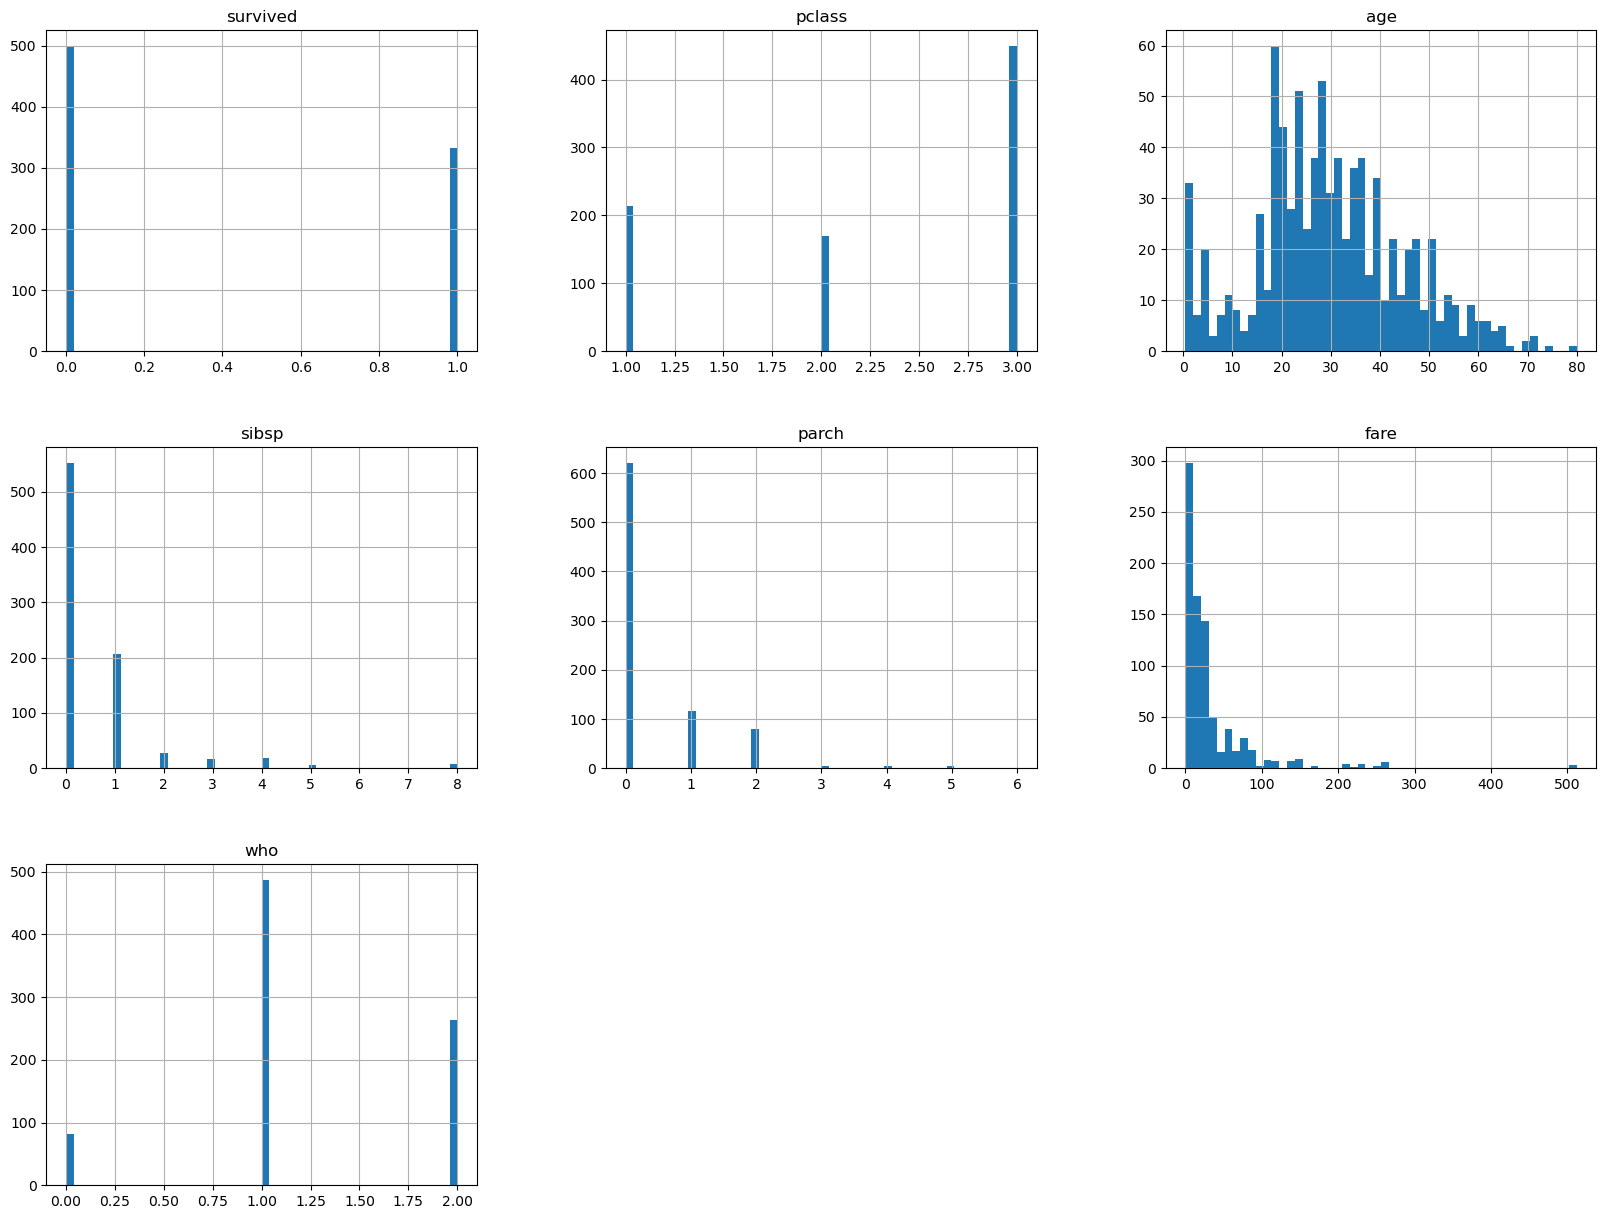

In [18]:
data.hist(bins=50,figsize=(20,15))

In [19]:
## We are predicting alive column based on selected columns and using of DecisiDecisionTreeClassifier

In [20]:
sc = data[['survived','pclass','age','sibsp','parch','who','alive']]

In [21]:
x = sc[['survived','pclass','age','sibsp','parch','who']]
y = sc['alive']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [23]:
model = DecisionTreeClassifier()

In [24]:
model_train = model.fit(x_train,y_train)

In [25]:
pred = model_train.predict(x_test)

In [26]:
pred

array(['yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 

In [27]:
confusion_matrix(y_test,pred)

array([[101,   0],
       [  0,  66]], dtype=int64)

In [28]:
result = confusion_matrix(y_test,pred)

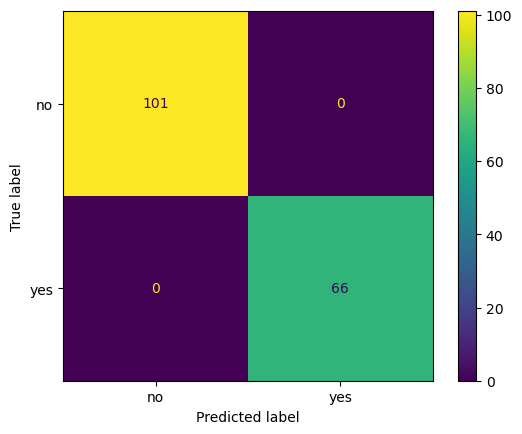

In [29]:
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()

In [30]:
print("Accuracy of the model is ")
accuracy_score(y_test,pred)


Accuracy of the model is 


1.0